In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import datetime
from collections import Counter
import shutil
import math
from sklearn import preprocessing
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import cv2
import pyautogui, time

In [4]:

test_classifier = os.listdir("PROCESSED_DATA")[0]
print("test classifier:", test_classifier)
test_image_file_path = "PROCESSED_DATA/" + test_classifier + "/" + os.listdir("PROCESSED_DATA/" + test_classifier)[0]
print("test image file path", test_image_file_path)
test_image = Image.open(test_image_file_path, mode="r")
image_height = test_image.height
image_width = test_image.width
print(image_width, image_height)
processed_folder_path = "PROCESSED_DATA/"
train_ds = tf.keras.utils.image_dataset_from_directory(
  processed_folder_path,
  validation_split=0.2,
  color_mode='grayscale',
  subset="training",  
  seed=123,
  image_size=(image_height, image_width),
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  processed_folder_path,
  validation_split=0.2,
  color_mode='grayscale',
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=32)

class_names = train_ds.class_names
print("classifier LIST: ", class_names)

test classifier: AAPL
test image file path PROCESSED_DATA/AAPL/BUY


PermissionError: [Errno 13] Permission denied: 'PROCESSED_DATA/AAPL/BUY'

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_height, image_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
            optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

Total params: 1,203,846
Trainable params: 1,203,846
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    min_delta=.01,
    verbose=1,  
    patience=10, 
    restore_best_weights=True,
)

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1,
  callbacks=[callback]
)
# epochs=100
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

Epoch 1/100
78/78 [==============================] - 9s 83ms/step - loss: 1.3233 - accuracy: 0.3599 - val_loss: 1.0801 - val_accuracy: 0.4194
Epoch 2/100
78/78 [==============================] - 6s 75ms/step - loss: 1.0198 - accuracy: 0.4610 - val_loss: 0.8534 - val_accuracy: 0.5774
Epoch 3/100
78/78 [==============================] - 6s 76ms/step - loss: 0.7582 - accuracy: 0.6341 - val_loss: 0.6043 - val_accuracy: 0.7032
Epoch 4/100
78/78 [==============================] - 6s 75ms/step - loss: 0.5273 - accuracy: 0.7508 - val_loss: 0.4284 - val_accuracy: 0.8081
Epoch 5/100
78/78 [==============================] - 6s 78ms/step - loss: 0.4705 - accuracy: 0.7645 - val_loss: 0.4258 - val_accuracy: 0.7790
Epoch 6/100
78/78 [==============================] - 6s 73ms/step - loss: 0.4154 - accuracy: 0.7923 - val_loss: 0.3554 - val_accuracy: 0.8226
Epoch 7/100
78/78 [==============================] - 6s 80ms/step - loss: 0.3745 - accuracy: 0.8233 - val_loss: 0.3637 - val_accuracy: 0.8274
Epoch 

Text(0.5, 1.0, 'Training and Validation Loss')

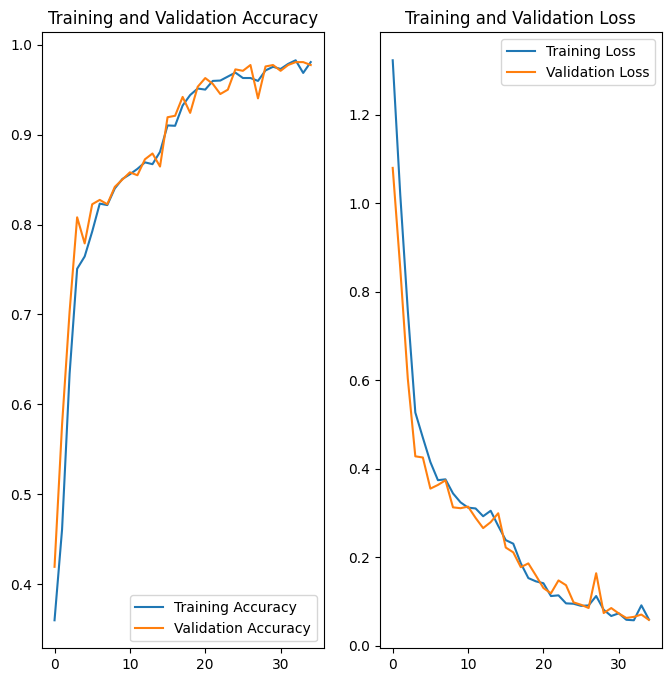

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')